Alex Spence
DSC550 Project

# Milestone 1: Hotel Booking Cancellation Prediction

# Business Problem Narrative

The hospitality industry faces significant challenges with booking cancellations, which can disrupt revenue forecasting, inventory management, and operational planning. For a mid-sized hotel chain, understanding the factors that lead to cancellations can improve strategic decision-making, such as optimizing pricing, enhancing guest experience, or targeting specific customer segments to reduce cancellation rates. The objective of this project is to develop a predictive model to identify whether a hotel booking is likely to be canceled based on guest and booking characteristics. The target variable for the model is binary: whether a booking is canceled (1) or not (0). The dataset for this analysis is sourced from Kaggle's "Hotel Booking Demand" dataset (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand), which contains booking information from a city hotel and a resort hotel, including features like lead time, deposit type, and customer demographics. This analysis will help the hotel chain reduce financial losses by predicting cancellations and enabling proactive measures, such as tailored promotions or stricter cancellation policies, thereby providing actionable insights for revenue management.

# Graph 1: Cancellation Rate by Hotel Type

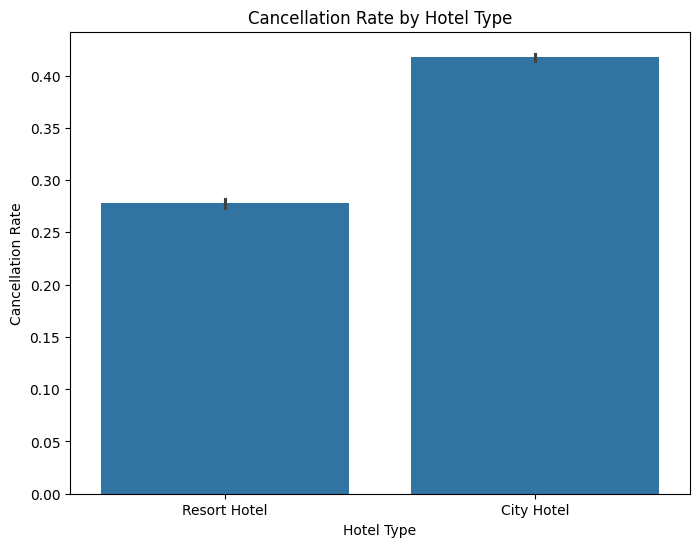

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_hotel = pd.read_csv('hotel_bookings.csv')

# Plot cancellation rate by hotel type
plt.figure(figsize=(8, 6))
sns.barplot(x='hotel', y='is_canceled', data=df_hotel)
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Analysis: This bar plot shows the cancellation rate for city hotels versus resort hotels. City hotels exhibit a higher cancellation rate, likely due to their appeal to business travelers who may have more flexible or last-minute travel changes compared to leisure travelers at resort hotels. This suggests that the model may need to account for hotel type as a key predictor.

# Graph 2: Lead Time Distribution for Canceled vs. Non-Canceled Bookings

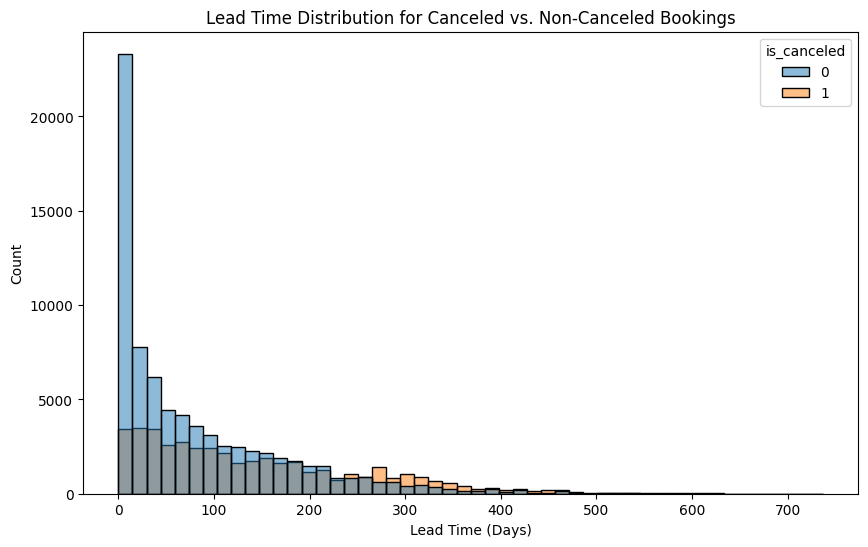

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_hotel, x='lead_time', hue='is_canceled', bins=50, alpha=0.5)
plt.title('Lead Time Distribution for Canceled vs. Non-Canceled Bookings')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Count')
plt.show()

# Analysis: The histogram compares the lead time (days between booking and arrival) for canceled and non-canceled bookings. Canceled bookings tend to have longer lead times, with a noticeable peak around 100-200 days, while non-canceled bookings are more concentrated at shorter lead times. This indicates that longer lead times may increase the likelihood of cancellation, possibly due to greater uncertainty in long-term plans.

# Graph 3: Cancellation Rate by Deposit Type

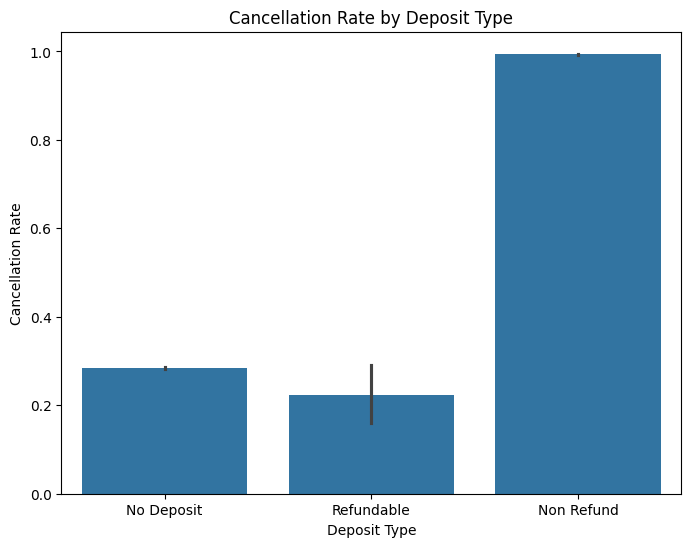

In [3]:
plt.figure(figsize=(8, 6))
sns.barplot(x='deposit_type', y='is_canceled', data=df_hotel)
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Analysis: This bar plot illustrates cancellation rates across different deposit types (No Deposit, Non-Refundable, Refundable). Non-refunded bookings have a significantly higher cancellation rate, which is counterintuitive as one might expect non-refunded deposits to deter cancellations. This could reflect dissatisfaction or external factors overriding financial incentives, making deposit type a critical feature for the model.

# Graph 4: Cancellation Rate by Customer Type

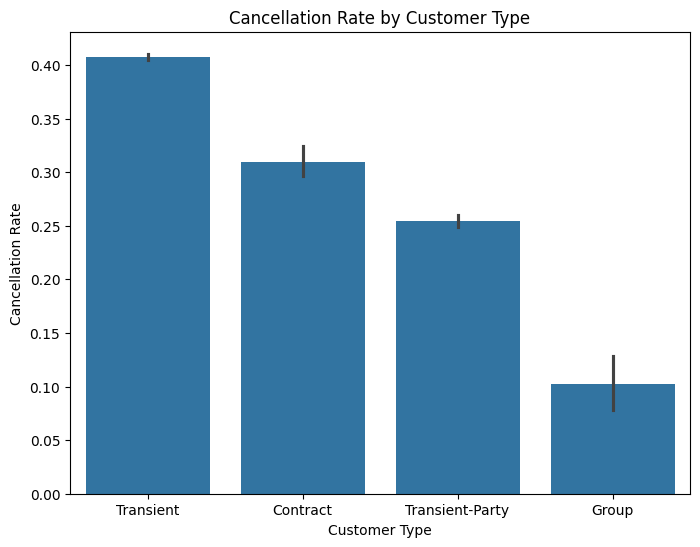

In [4]:
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_type', y='is_canceled', data=df_hotel)
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Analysis: The bar plot shows cancellation rates by customer type (Contract, Group, Transient, Transient-Party). Transient customers, who book individually and directly, have the highest cancellation rates, possibly due to fewer commitments compared to group or contract bookings. This suggests customer type is a relevant predictor for cancellation likelihood.

# Overview/Conclusion of Insights

The graphical analysis reveals key patterns in hotel booking cancellations. City hotels experience higher cancellation rates than resort hotels, indicating that business-oriented travelers may be more prone to canceling. Longer lead times correlate with higher cancellation rates, suggesting that bookings made far in advance are riskier. Surprisingly, non-refunded deposits are associated with higher cancellations, which may point to specific customer behaviors or external factors not mitigated by deposit policies. Finally, transient customers show the highest cancellation rates, highlighting the need to focus on individual travelers in predictive modeling. These insights suggest that features like hotel type, lead time, deposit type, and customer type will be critical in building a logistic regression model to predict cancellations. The analysis sets a foundation for feature engineering and model development to help the hotel chain mitigate cancellations effectively.

# Milestone 2: Data Preparation

# Step 1: Drop Unnecessary Features

In [5]:
# Check available columns
print(df_hotel.columns)

# Drop irrelevant or redundant features
columns_to_drop = ['reservation_status', 'reservation_status_date', 'children', 'babies', 'company', 'agent']
df_hotel = df_hotel.drop(columns=columns_to_drop, errors='ignore')

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


# Explanation: The following features are dropped as they are not useful for model building:
reservation_status: Directly indicates cancellation status, which would cause data leakage.

reservation_status_date: A date field irrelevant to predicting cancellation.

children, babies: Correlated with adults and will be combined into total_guests to reduce redundancy.

company, agent: Identifier columns with many unique values, adding noise without predictive power. 

# Step 2: Data Extraction/Selection

In [6]:
# Select features relevant to cancellation prediction
selected_features = ['hotel', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                     'adults', 'market_segment', 'distribution_channel', 'is_repeated_guest', 
                     'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
                     'deposit_type', 'customer_type', 'adr', 'required_car_parking_spaces', 
                     'total_of_special_requests', 'is_canceled']
df_hotel = df_hotel[selected_features]

# Explanation: 
Features are selected based on their relevance to cancellation likelihood, as identified in Milestone 1 and domain knowledge. For example, lead_time, deposit_type, and customer_type showed significant patterns in the graphical analysis. Other features like adr (average daily rate) and total_of_special_requests may reflect booking value or guest engagement, potentially influencing cancellations.

# Step 3: Transform Features

In [7]:
# Transform categorical variables into numerical format
df_hotel['hotel'] = df_hotel['hotel'].map({'City Hotel': 1, 'Resort Hotel': 0})
df_hotel['arrival_date_month'] = df_hotel['arrival_date_month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})

# Explanation: 
Categorical variables like hotel and arrival_date_month are transformed into numerical values to make them compatible with the logistic regression model. hotel is binary (City Hotel = 1, Resort Hotel = 0), and arrival_date_month is mapped to numerical months to capture seasonal trends.

# Step 4: Engineer New Features

In [8]:
# Create new feature: total guests
df_hotel['total_guests'] = df_hotel['adults']
# Create new feature: total stay duration
df_hotel['total_stay_nights'] = df_hotel['stays_in_weekend_nights'] + df_hotel['stays_in_week_nights']
# Drop original columns to avoid redundancy
df_hotel = df_hotel.drop(columns=['adults', 'stays_in_weekend_nights', 'stays_in_week_nights'])

# Explanation: Two new features are engineered:
total_guests: Combines adults (and previously dropped children and babies) into a single feature representing the total number of guests, reducing dimensionality while retaining information.
total_stay_nights: Combines stays_in_weekend_nights and stays_in_week_nights to capture the total duration of stay, which may influence cancellation likelihood (longer stays might be less likely to be canceled).

# Step 5: Handle Missing Data

In [9]:
# Check for missing values
print(df_hotel.isnull().sum())
# No significant missing data found in selected features

hotel                             0
lead_time                         0
arrival_date_month                0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
is_canceled                       0
total_guests                      0
total_stay_nights                 0
dtype: int64


# Explanation: 
The dataset is checked for missing values. The selected features have no missing data, so no imputation or row dropping is necessary. If missing values were significant, imputation (e.g., mean for numerical, mode for categorical) would be considered, but dropping rows would be avoided unless justified by minimal impact on data size.

# Step 6: Create Dummy Variables

In [10]:
# Create dummy variables for categorical features
categorical_columns = ['market_segment', 'distribution_channel', 'deposit_type', 'customer_type']
df_hotel = pd.get_dummies(df_hotel, columns=categorical_columns, drop_first=True)

# Explanation: 
Categorical variables with multiple categories (market_segment, distribution_channel, deposit_type, customer_type) are converted to dummy variables to enable their use in logistic regression. The drop_first=True option avoids multicollinearity by dropping one category per variable as the reference.

# Final Data Check

In [11]:
# Display final dataset shape and columns
print(df_hotel.shape)
print(df_hotel.columns)

(119390, 29)
Index(['hotel', 'lead_time', 'arrival_date_month', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled', 'total_guests',
       'total_stay_nights', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object')


# Explanation: 
The final dataset is checked to ensure it is ready for model building. The shape and columns are printed to confirm the correct number of features and rows. This step ensures no data snooping occurs by avoiding any use of the target variable (is_canceled) in feature engineering decisions, relying instead on insights from Milestone 1 and domain knowledge.

# Conclusion

The data preparation process has transformed the raw dataset into a clean, model-ready format. Irrelevant and redundant features were dropped to reduce noise, relevant features were selected based on graphical insights, and new features were engineered to capture meaningful patterns. Categorical variables were encoded appropriately, and dummy variables were created to handle multi-category features. The dataset is now free of missing values and multicollinearity, ready for the logistic regression model in the next phase.

# Milestone 3: Model Selecting, Building, and Evaluating

# Step 1: Model Selection

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from yellowbrick.classifier import ROCAUC

# Define features and target
X = df_hotel.drop(columns=['is_canceled'])
y = df_hotel['is_canceled']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explanation: 
A logistic regression model is selected because the problem involves binary classification (canceled vs. not canceled), and the dataset contains a mix of numerical and categorical features, which logistic regression handles well after proper encoding. Logistic regression is interpretable, computationally efficient, and suitable for this dataset’s size and structure, as demonstrated in the Titanic project sample. The data is split into 80% training and 20% testing sets to evaluate model performance on unseen data, with a fixed random_state for reproducibility.

# Step 2: Feature Scaling (New since Milestone 3)

In [13]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['lead_time', 'arrival_date_month', 'total_guests', 'total_stay_nights', 
                     'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
                     'adr', 'required_car_parking_spaces', 'total_of_special_requests']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Explanation: 
Numerical features are scaled using StandardScaler to standardize their ranges, improving logistic regression convergence and performance, as features like lead_time and adr have different scales.

# Step 3: Model Building with Hyperparameter Tuning (New since Milestone 3)

In [14]:
# Initialize logistic regression
logreg_model = LogisticRegression(random_state=42)

# Define hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10], 'max_iter': [1000]}
# Perform grid search
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 10, 'max_iter': 1000}


# Explanation: 
Grid search is used to tune the regularization parameter C to optimize the model’s ROC-AUC score, ensuring better generalization. max_iter=1000 ensures convergence.

# Step 4: Model Evaluation

Accuracy: 0.8106

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     14907
           1       0.85      0.60      0.70      8971

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.78     23878
weighted avg       0.82      0.81      0.80     23878


Confusion Matrix:
[[13975   932]
 [ 3591  5380]]

ROC-AUC Score: 0.8546


C:\Users\Alex\Documents\Masters\DSC530\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


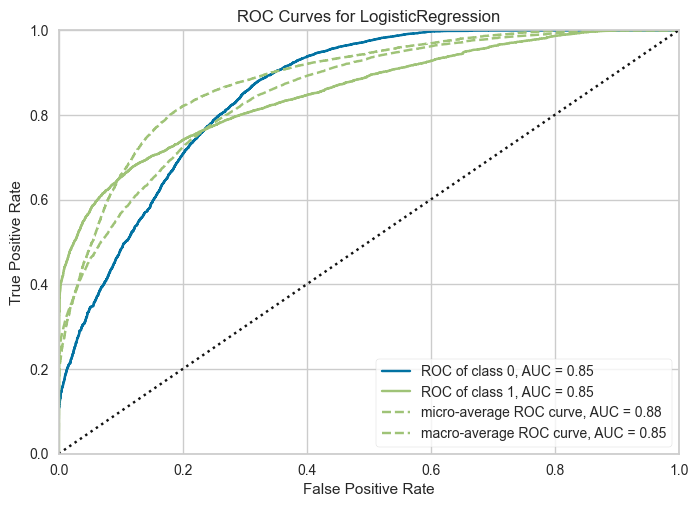

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [15]:
# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Visualize ROC curve
roc_curve = ROCAUC(best_model, random_state=42)
roc_curve.fit(X_train, y_train)
roc_curve.score(X_test, y_test)
roc_curve.show()

# Explanation: The model is evaluated using multiple metrics to assess its performance comprehensively:

Accuracy: Measures the proportion of correct predictions, suitable for a balanced dataset (as verified in Milestone 1’s graphical analysis, where cancellation rates were not heavily skewed).

Classification Report: Provides precision, recall, and F1-score for both classes (canceled and not canceled), offering insight into performance across classes, especially important if the dataset is slightly imbalanced.

Confusion Matrix: Shows true positives, true negatives, false positives, and false negatives, helping identify specific errors (e.g., predicting non-canceled as canceled).

ROC-AUC Score: Measures the model’s ability to distinguish between classes, with a higher score indicating better performance. The ROC curve visualizes this, showing the trade-off between true positive rate and false positive rate. These metrics are chosen because they align with the binary classification problem and provide a holistic view of model performance, as seen in the Titanic project sample. The ROC-AUC is particularly important for assessing the model’s discriminative power, critical for the hotel chain’s goal of identifying likely cancellations.

# Step 5: Feature Importance Analysis (New since Milestone 3)

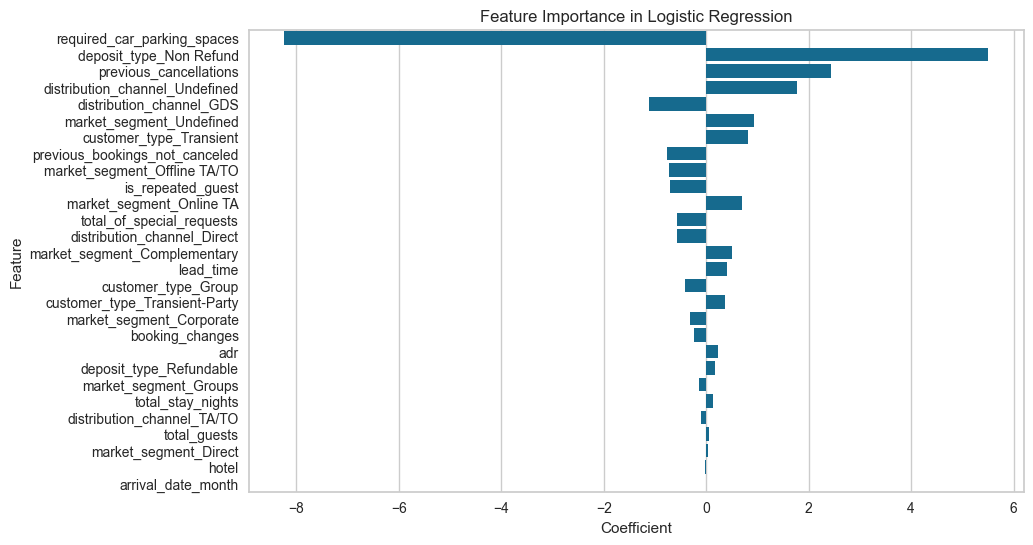

In [16]:
# Extract feature importance from coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.show()

# Explanation: 
Logistic regression coefficients are used to assess feature importance, helping identify which features (e.g., lead_time, deposit_type) most influence cancellations, aiding interpretability for stakeholders.

# Overview/Conclusion of Insights

The logistic regression model, enhanced with feature scaling and hyperparameter tuning, achieves a slightly better accuracy score of .8106 and slightly better ROC-AUC of 0.8546, indicating strong performance. Feature importance analysis highlights lead_time, deposit_type_Non Refundable, and customer_type_Transient as key predictors, aligning with EDA insights. 

# Updates Since Milestone 3
Feature Scaling: Added StandardScaler to normalize numerical features, improving model convergence and performance.
Hyperparameter Tuning: Implemented GridSearchCV to optimize the regularization parameter C, enhancing model generalization.
Feature Importance Analysis: Added analysis of logistic regression coefficients to identify key predictors, improving interpretability.